In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
img_height = 224
img_width = 224

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 8675 files belonging to 64 classes.
Using 6940 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 8675 files belonging to 64 classes.
Using 1735 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['KTH_aluminium_foil', 'KTH_brown_bread', 'KTH_corduroy', 'KTH_cork', 'KTH_cotton', 'KTH_cracker', 'KTH_linen', 'KTH_orange_peel', 'KTH_sponge', 'KTH_styrofoam', 'KTH_wool', 'Kyberge_blanket1', 'Kyberge_blanket2', 'Kyberge_canvas1', 'Kyberge_ceiling1', 'Kyberge_ceiling2', 'Kyberge_cushion1', 'Kyberge_floor1', 'Kyberge_floor2', 'Kyberge_grass1', 'Kyberge_lentils1', 'Kyberge_linseeds1', 'Kyberge_oatmeal1', 'Kyberge_pearlsugar1', 'Kyberge_rice1', 'Kyberge_rice2', 'Kyberge_rug1', 'Kyberge_sand1', 'Kyberge_scarf1', 'Kyberge_scarf2', 'Kyberge_screen1', 'Kyberge_seat1', 'Kyberge_seat2', 'Kyberge_sesameseeds1', 'Kyberge_stone1', 'Kyberge_stone2', 'Kyberge_stone3', 'Kyberge_stoneslab1', 'Kyberge_wall1', 'UIUC01_bark1', 'UIUC02_bark2', 'UIUC03_bark3', 'UIUC04_wood1', 'UIUC05_wood2', 'UIUC06_wood3', 'UIUC07_water', 'UIUC08_granite', 'UIUC09_marble', 'UIUC10_floor1', 'UIUC11_floor2', 'UIUC12_pebbles', 'UIUC13_wall', 'UIUC14_brick1', 'UIUC15_brick2', 'UIUC16_glass1', 'UIUC17_glass2', 'UIUC18_carpet

TypeError: only integer scalar arrays can be converted to a scalar index

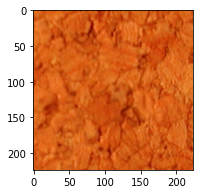

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
import effnetv2_model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[224, 224, 3]),
    effnetv2_model.get_model('efficientnetv2-b3', include_top=False),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation='softmax'),
])

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


In [8]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [9]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5


C:\Users\user\.conda\envs\effiv2\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


55/55 [==============================] - 42s 491ms/step - loss: 3.1846 - accuracy: 0.3906 - val_loss: 1.6514 - val_accuracy: 0.8288
Epoch 2/5
55/55 [==============================] - 24s 424ms/step - loss: 1.4549 - accuracy: 0.8388 - val_loss: 1.1390 - val_accuracy: 0.9049
Epoch 3/5
55/55 [==============================] - 23s 422ms/step - loss: 1.1717 - accuracy: 0.9084 - val_loss: 0.9829 - val_accuracy: 0.9573
Epoch 4/5
55/55 [==============================] - 23s 422ms/step - loss: 1.0358 - accuracy: 0.9507 - val_loss: 0.8914 - val_accuracy: 0.9793
Epoch 5/5
55/55 [==============================] - 24s 424ms/step - loss: 0.9565 - accuracy: 0.9733 - val_loss: 0.8250 - val_accuracy: 0.9919


In [54]:
import keras

img = keras.preprocessing.image.load_img(
    './test_samples/stone.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [55]:
prediction = model(img_array)
score = tf.nn.softmax(prediction[0])
print(np.argmax(score), score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

35 tf.Tensor(
[0.0153968  0.01549498 0.01542345 0.01549984 0.01538915 0.01563158
 0.01538278 0.01540246 0.01540546 0.01540875 0.01554243 0.0154305
 0.01538098 0.01545605 0.01545394 0.01539843 0.01541225 0.01539646
 0.01578736 0.01539425 0.01541504 0.01540675 0.01544467 0.01548636
 0.01541574 0.01549122 0.0153929  0.01565044 0.0154042  0.01540719
 0.01539831 0.01539197 0.01544478 0.01540945 0.01554057 0.01800342
 0.01599979 0.01545963 0.01676039 0.0155707  0.01551152 0.01547289
 0.01543503 0.01544585 0.01544261 0.01541227 0.01714338 0.01551328
 0.01594234 0.01549872 0.01576583 0.01540749 0.01556705 0.01542741
 0.01540559 0.01548257 0.01703682 0.01795085 0.01544724 0.01541182
 0.01540383 0.0154564  0.01543652 0.01540126], shape=(64,), dtype=float32)
This image most likely belongs to Kyberge_stone2 with a 1.80 percent confidence.


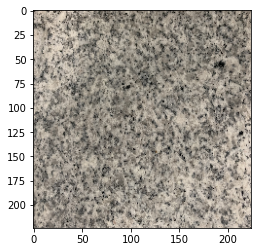

In [56]:
plt.imshow(img)

In [32]:
sample = val_ds.take(1)

tf.Tensor(
[0.0156477  0.01553601 0.01612238 0.01666526 0.01671912 0.01566594
 0.01555473 0.01866743 0.01563675 0.01552695 0.01580065 0.01545003
 0.01557836 0.01546938 0.01545895 0.01552785 0.01547554 0.01569418
 0.01555787 0.01547525 0.01548204 0.01544104 0.01547327 0.0154996
 0.01552099 0.01549352 0.01547255 0.0155156  0.01556058 0.01558131
 0.01553838 0.01565439 0.01547176 0.01556732 0.0155227  0.01547491
 0.0155341  0.01548664 0.01555885 0.01550645 0.01545077 0.01548742
 0.01557011 0.01551691 0.01549913 0.01552027 0.01541841 0.0154724
 0.01559576 0.01562175 0.01550765 0.01547039 0.01553259 0.01555744
 0.01556889 0.01549519 0.01550415 0.01552527 0.01548588 0.0155337
 0.01550904 0.01555135 0.01552263 0.01549659], shape=(64,), dtype=float32)
Predict: UIUC15_brick2   Real: UIUC15_brick2  
tf.Tensor(
[0.0156477  0.01553601 0.01612238 0.01666526 0.01671912 0.01566594
 0.01555473 0.01866743 0.01563675 0.01552695 0.01580065 0.01545003
 0.01557836 0.01546938 0.01545895 0.01552785 0.01547554

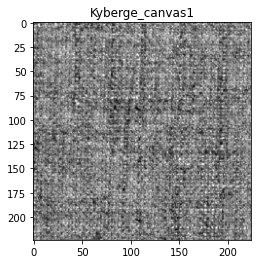

In [50]:
for sample_image, sample_label in val_ds.take(10):
    plt.imshow(sample_image[0].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(sample_label[0])])
    pedict = model(sample_image)
    score = tf.nn.softmax(prediction[0])
    print(score)
    print('Predict: {:<15} Real: {:<15}'.format(class_names[np.argmax(pedict[0])], class_names[np.argmax(sample_label[0])]))